In [69]:
import math
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('diamonds.csv', index_col=0)
pd.set_option('display.max_columns', None)
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [96]:
df.shape 
#gives the rows and columns of the dataset

(219703, 25)

In [71]:
#displaying all the columns of the diamond dataset
df.columns

Index(['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab',
       'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition',
       'depth_percent', 'table_percent', 'meas_length', 'meas_width',
       'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

In [73]:
df.dtypes

cut                             object
color                           object
clarity                         object
carat_weight                   float64
cut_quality                     object
lab                             object
symmetry                        object
polish                          object
eye_clean                       object
culet_size                      object
culet_condition                 object
depth_percent                  float64
table_percent                  float64
meas_length                    float64
meas_width                     float64
meas_depth                     float64
girdle_min                      object
girdle_max                      object
fluor_color                     object
fluor_intensity                 object
fancy_color_dominant_color      object
fancy_color_secondary_color     object
fancy_color_overtone            object
fancy_color_intensity           object
total_sales_price                int64
dtype: object

Now we will use the describe() function which provides basic statistics about the numeric columns in the DataFrame. It includes metrics like count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

In [74]:
df.describe()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [75]:
def print_unique_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [76]:
print_unique_values(df)

cut: ['Round' 'Pear' 'Oval' 'Marquise' 'Princess' 'Emerald' 'Heart' 'Cushion'
 'Radiant' 'Cushion Modified' 'Asscher']
color: ['E' 'F' 'L' 'D' 'J' 'I' 'G' 'H' 'M' 'K' 'unknown']
clarity: ['VVS2' 'VVS1' 'I1' 'VS1' 'VS2' 'IF' 'SI2' 'I2' 'SI1' 'SI3' 'I3']
cut_quality: ['Excellent' 'Very Good' 'unknown' 'Good' 'Fair' 'Ideal']
lab: ['IGI' 'GIA' 'HRD']
symmetry: ['Very Good' 'Excellent' 'Good' 'Fair' 'Poor']
polish: ['Very Good' 'Excellent' 'Good' 'Fair' 'Poor']
eye_clean: ['unknown' 'Yes' 'E1' 'Borderline' 'No']
culet_size: ['N' 'unknown' 'S' 'M' 'VS' 'L' 'EL' 'SL' 'VL']
culet_condition: ['unknown' 'Abraded' 'Chipped' 'Pointed']
girdle_min: ['M' 'STK' 'TN' 'TK' 'unknown' 'VTN' 'VTK' 'XTK' 'XTN' 'STN']
girdle_max: ['M' 'STK' 'TK' 'unknown' 'TN' 'VTK' 'XTK' 'XTN' 'VTN' 'STN']
fluor_color: ['unknown' 'Blue' 'Yellow' 'Green' 'White' 'Orange']
fluor_intensity: ['None' 'Very Slight' 'Strong' 'Medium' 'Faint' 'Very Strong' 'unknown'
 'Slight']
fancy_color_dominant_color: ['unknown' 'Orange' 'Brown

In [77]:
categorical_columns = [col for col in df if df[col].dtype == 'object']
categorical_columns

['cut',
 'color',
 'clarity',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

BOX PLOTS

Box Plot displays the five-number summary of a set of data with the help of a box and a few verticle lines.



*   Minimum: Q1-1.5*IQR
*   1st quartile (Q1): 25th percentile
*   Median:50th percentile
*   3rd quartile(Q3):75th percentile
*   Maximum: Q3+1.5*IQR

IQR - Inter Quartile Range (region between 1st quartile and 3rd quartile\). 50% of the total data lies in this region.

The box plot also allows to discover the outliers, the points beyond the vertical lines, i.e. the points lying in Minimum and Maximum regions.


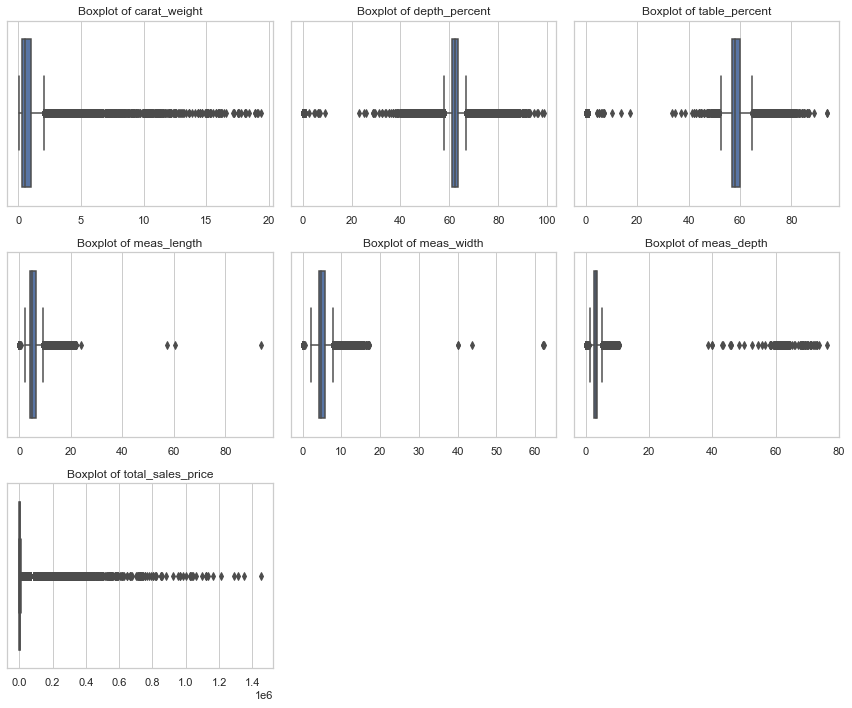

In [78]:
sns.set_theme(style="whitegrid")

# Creating a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Flattenning the axes array for easier iteration
axes = axes.flatten()

# List of numeric columns for creating boxplots
numeric_columns = ["carat_weight", "depth_percent", "table_percent",
                   "meas_length", "meas_width", "meas_depth",
                   "total_sales_price"]

# Creating boxplots for each numeric column
for ax, col in zip(axes, numeric_columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Removing the last 2 unused subplots
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

1st Plot: "carat_weight"

*   Carat Weight refers to the mass of the diamond. Hence, it depicts that the carat weight is skewed and maximum values is concentrated between 0 to 2. There are lot of outliers points.


2nd Plot: "depth_percent"

*   Depth Percent is the relative measurements of the depth of the diamonds. This is partially symmetric data, and most of the values are concentrated in between 60 to 65 roughly. There are outlier points on both sides of the centralized data.



3rd Plot: "table_percent"


*   Table Percent is the relative measurements of the flat part of the top of the diamonds. This is partially symmetric data, and most of the values are concentrated in between 56 to 61 roughly. There are outlier points on both sides of the centralized data.


4th Plot: "meas_length"


*   The "meas _ength" for a diamond refers to the measured length of the diamond when viewed from the top. This is skewed data, where most of the values are concentrated in between 2 to 8 roughly. There are very few outlier points.

5th Plot: "meas_width"


*   The "meas_width" typically refers to the width of the diamond when viewed from the top. This is skewed data, where most of the values are concentrated in between 2 to 8 roughly. There are very few outlier points in this case too.

6th Plot: "meas_depth"


*   The "meas_depth" of a diamond is measured from the table (the flat top surface of the diamond) to the culet (the pointed bottom tip of the diamond). This is skewed data, where most of the values are concentrated in between 1 to 5 roughly. It have few outlier points.

7th Plot: "total_sales_price"


*   It tells about the final prices of the diamonds in dollars based on its physical characteristics. This is highly skewed data, where maximum values are concentrated around $10000 roughly. It has a high number of outlier points.

In [79]:
upper=[2.035,66.95,64.5,9.35,7.785,5.055,-5415.5]
lower=[-0.725,57.75,52.5,1.35,2.225,1.255,11580.5]

print('Outlier in percentage')
for i in range(7):
    count=0
    for val in df[numeric_columns[i]]:
        if val>upper[i] or val<lower[i]:
            count=count+1

    print(numeric_columns[i]+' : '+str(count/len(df[numeric_columns[i]])*100)+' %')

Outlier in percentage
carat_weight : 4.299895768378219 %
depth_percent : 15.840020391164437 %
table_percent : 12.162328234025024 %
meas_length : 4.49789033376877 %
meas_width : 5.214312048538254 %
meas_depth : 4.1487826747927885 %
total_sales_price : 100.0 %


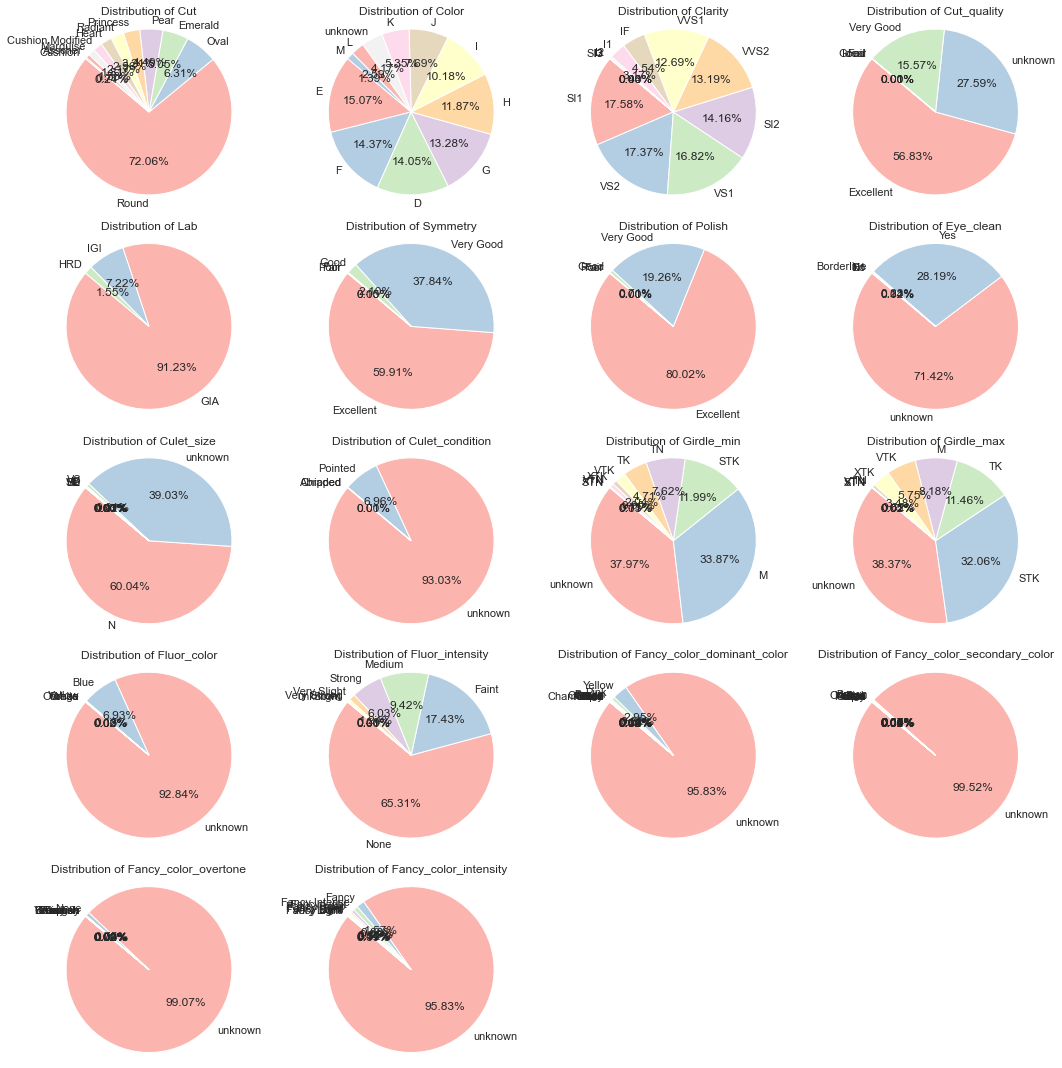

In [80]:
features = ["cut", 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition',
            'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 
            'fancy_color_overtone', 'fancy_color_intensity', ]

# Set up the grid of subplots
num_rows = 5  # Number of rows in the grid
num_cols =  4 # Number of columns in the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))


# Define a color palette using Seaborn's 'Pastel1' colormap
color_palette = sns.color_palette('Pastel1')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for idx, feature in enumerate(features):
    feature_counts = df[feature].value_counts()
    labels = feature_counts.index
    sizes = feature_counts.values
    colors = color_palette[:len(labels)]

    ax = axes[idx]  # Get the current subplot

    # Create the pie chart on the current subplot
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
    ax.set_title(f'Distribution of {feature.capitalize()}')
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

#not displaying the empty subplots
for i in range(len(features), num_rows * num_cols):
    axes[i].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

From the above analysis we can conclude that columns 
1) fluor_color
2) fancy_color_dominant_color
3) fancy_color_secondary_color
4) fancy_color_overtone
5) fancy_color_intensity
6) eye_clean
7) culet_condition

have very high proportion of unknown values.

Apart from that we can see that the columns like
1) lab
2) cut
3) symmetry

are significantly imbalabced.
The prevalence of specific values indicates a potential industry standard or common preference among customers.


Features like 'color', 'clarity', 'girdle_min' and 'girdle_max' show a more evenly distributed data.
 These features exhibit a more uniform distribution, indicating that there is no strong bias or preference toward specific values. The values are spread out across the available range.
 In the context of diamonds, 'color' and 'clarity' are often used to differentiate and classify diamonds into various quality grades. An even distribution suggests that diamonds with different colors or clarity grades are present in the dataset.

<AxesSubplot: >

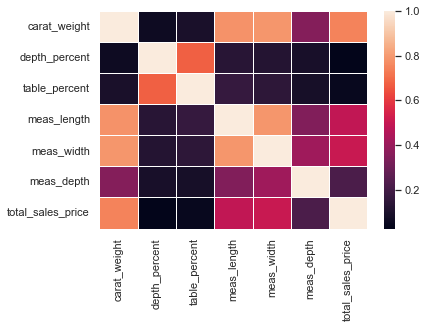

In [81]:
sns.heatmap(data=df.corr(), lw = 1)

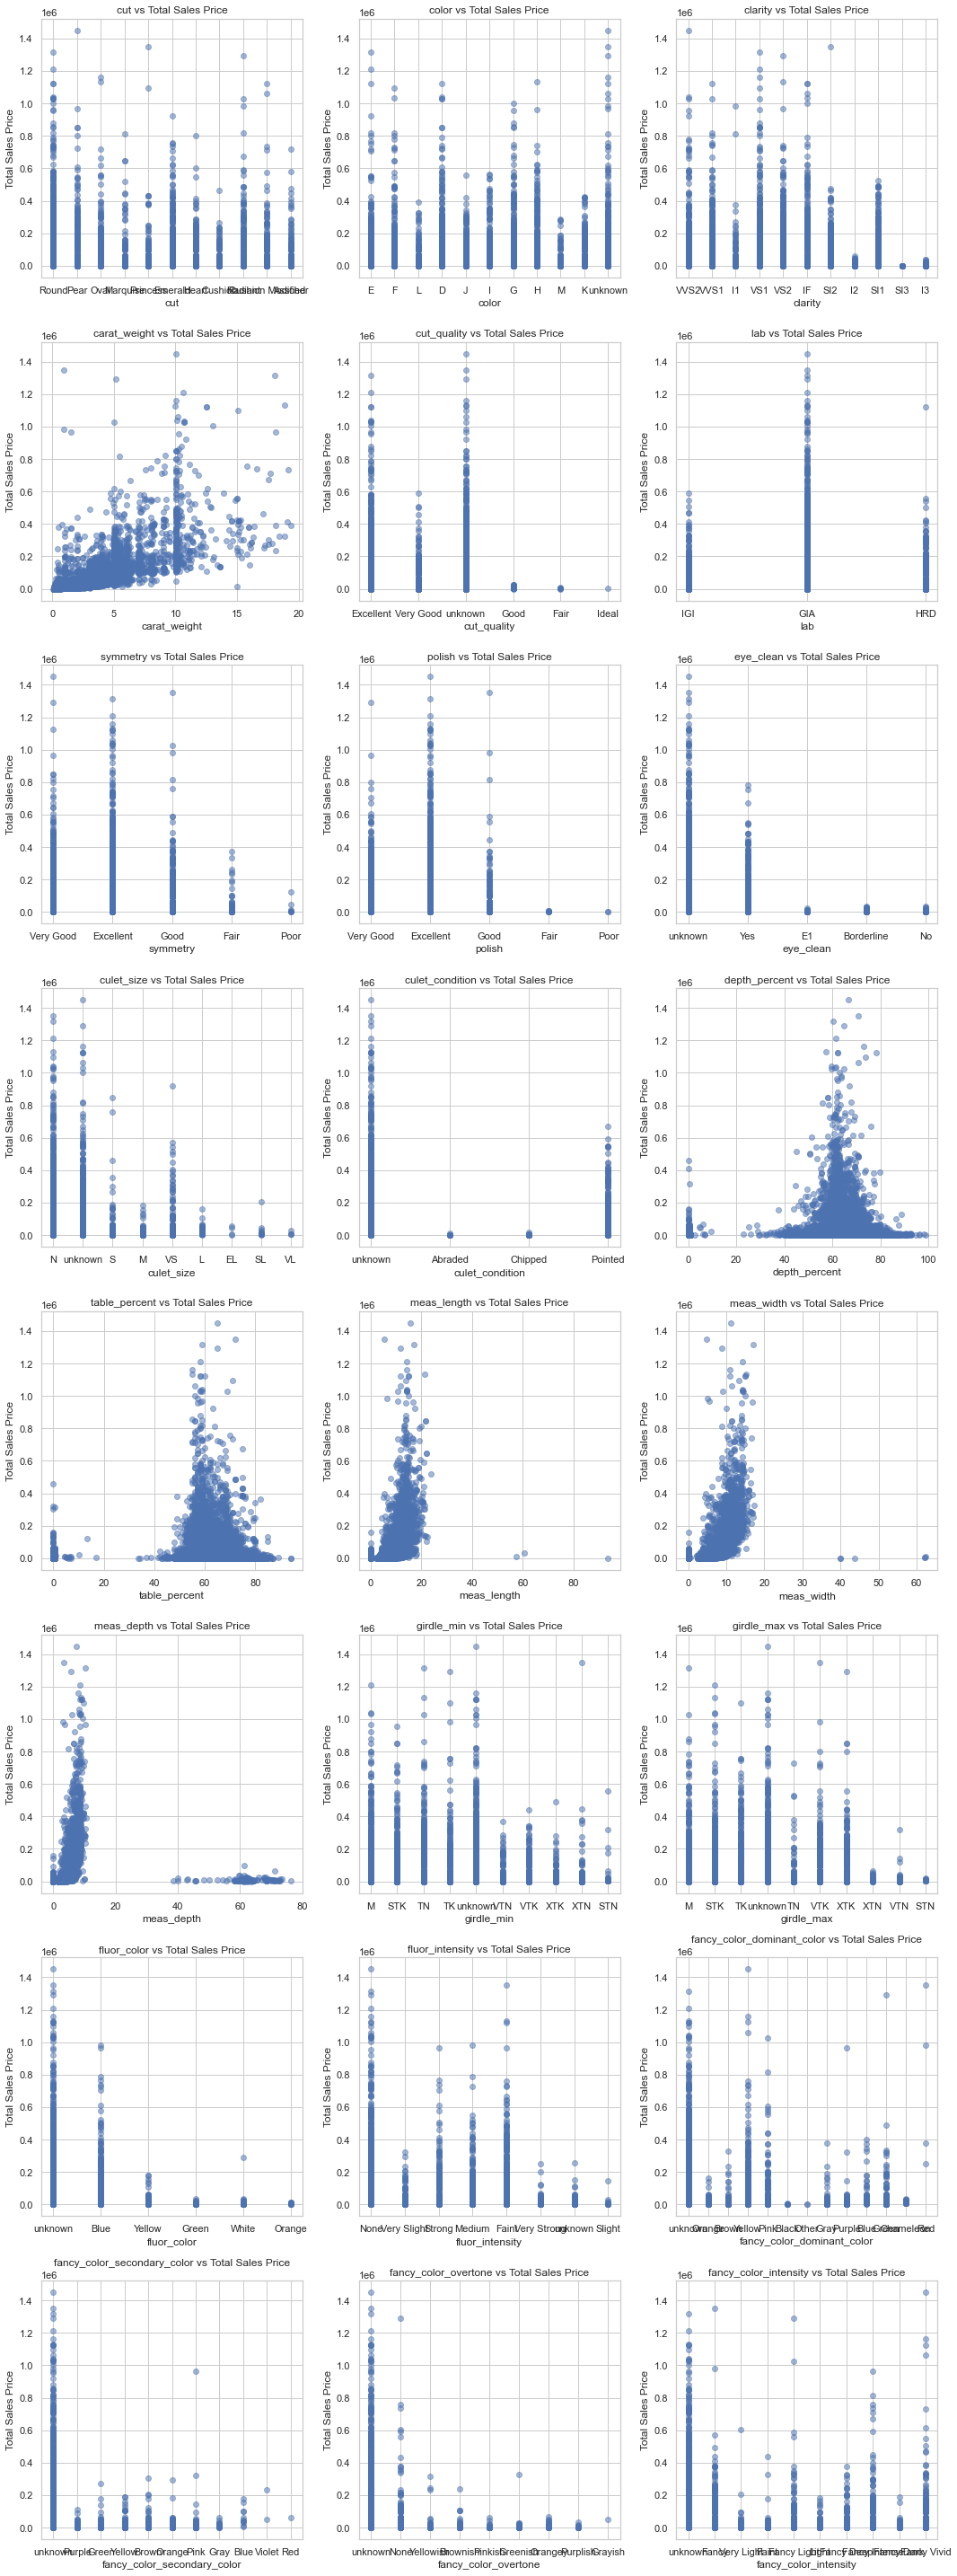

In [98]:
# List of all features (excluding the target variable)
features = [col for col in df.columns if (col != 'total_sales_price' and col!='Unnamed: 0')]

# Define the number of rows and columns for subplots
num_rows = len(features) // 3 
num_cols = 3

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through each feature and create scatter plots
for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(df[feature], df['total_sales_price'], alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel('Total Sales Price')
    ax.set_title(f'{feature} vs Total Sales Price')

#not displaying the empty subplots
for i in range(len(features), num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


This are the scatter plots of all the features with respect to the "total_sales_price". All of these depicts how a particular feature varies with respect to the total price of the diamonds. The features includes numerical as well as categorical data.

We can observe from the plots that cut, color and clarity varies symmetrically with the total sales price and have very few outlier points which affects the total prices.

The cut_quality data is skewed with respect to total sale price. In the "lab" feature, we see that the diamond with the lab certificate of the GIA has higher sales price than the others. The carat_weight which is numerical in nature seems to be distributed with the sales price of the diamonds.

We can see that for better polish and symmetry, the sale price is also high which is an expected behviour.

Also, for a greater meas length, meas depth and meas width, the sale price is more which is again expected as if the size of the diamond increase, the price will increase too.

Certain features like 'culet_condition', 'eye_clean', 'fluor_color', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone' and 'fancy_color_intensity' have more data which is unknown and so we can't really comment about their relationship with the total sale price.

When looking at a diamond from the top, the girdle is the part of the stone that creates the outline. From the side, the girdle separates the pavilion, or bottom, from the crown, the set of facets around the top. The girdle_min and girdle_max seems to be distributed in the data.


A high correlation can be seen with 'carat_weight', 'meas_length', 'meas_width', 'meas_depth' and 'depth_percent'. So lets analyze it further:

<AxesSubplot: xlabel='carat_weight', ylabel='meas_length'>

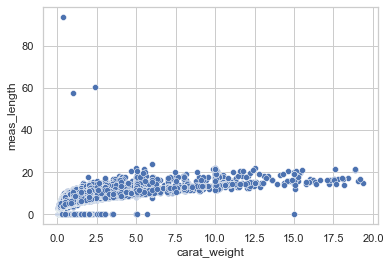

In [83]:
sns.scatterplot(x=df["carat_weight"], y=df["meas_length"])

<AxesSubplot: xlabel='carat_weight', ylabel='meas_depth'>

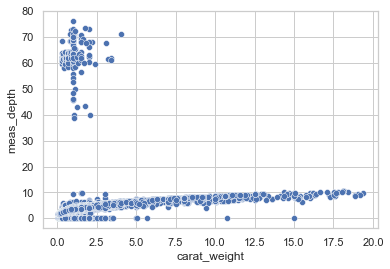

In [84]:
sns.scatterplot(x=df["carat_weight"], y=df["meas_depth"])

<AxesSubplot: xlabel='carat_weight', ylabel='meas_width'>

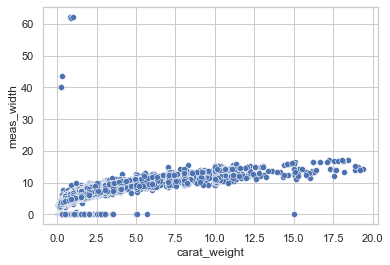

In [85]:
sns.scatterplot(x=df["carat_weight"], y=df["meas_width"])

<AxesSubplot: xlabel='meas_length', ylabel='meas_width'>

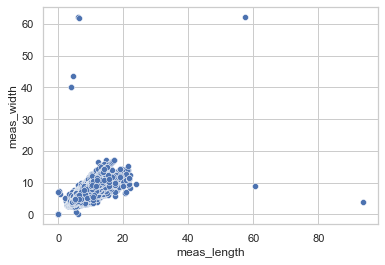

In [86]:
sns.scatterplot(x=df["meas_length"], y=df["meas_width"])

<AxesSubplot: xlabel='carat_weight', ylabel='total_sales_price'>

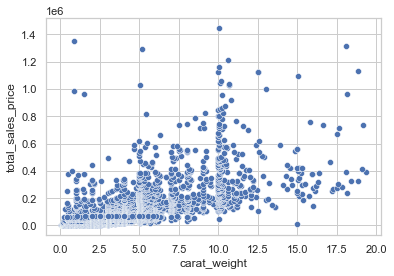

In [87]:
sns.scatterplot(x=df["carat_weight"], y=df["total_sales_price"])

From the above plots we can conclude that there is a heavy correlation between carat weight, meas length, meas width, meas depth.

The positive correlation between 'carat weight' and 'meas length', 'meas width', 'meas depth' is expected. Diamonds with larger dimensions tend to have higher carat weights. This is because carat weight is a measure of a diamond's mass, which is closely related to its physical size.




<AxesSubplot: xlabel='color', ylabel='total_sales_price'>

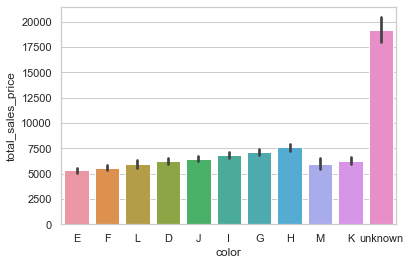

In [88]:
sns.barplot(x='color', y='total_sales_price', data=df)

We can conclude from the above plot that different colors have different price and some color are more valuable than others.

c:\Users\nancy\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nancy\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nancy\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

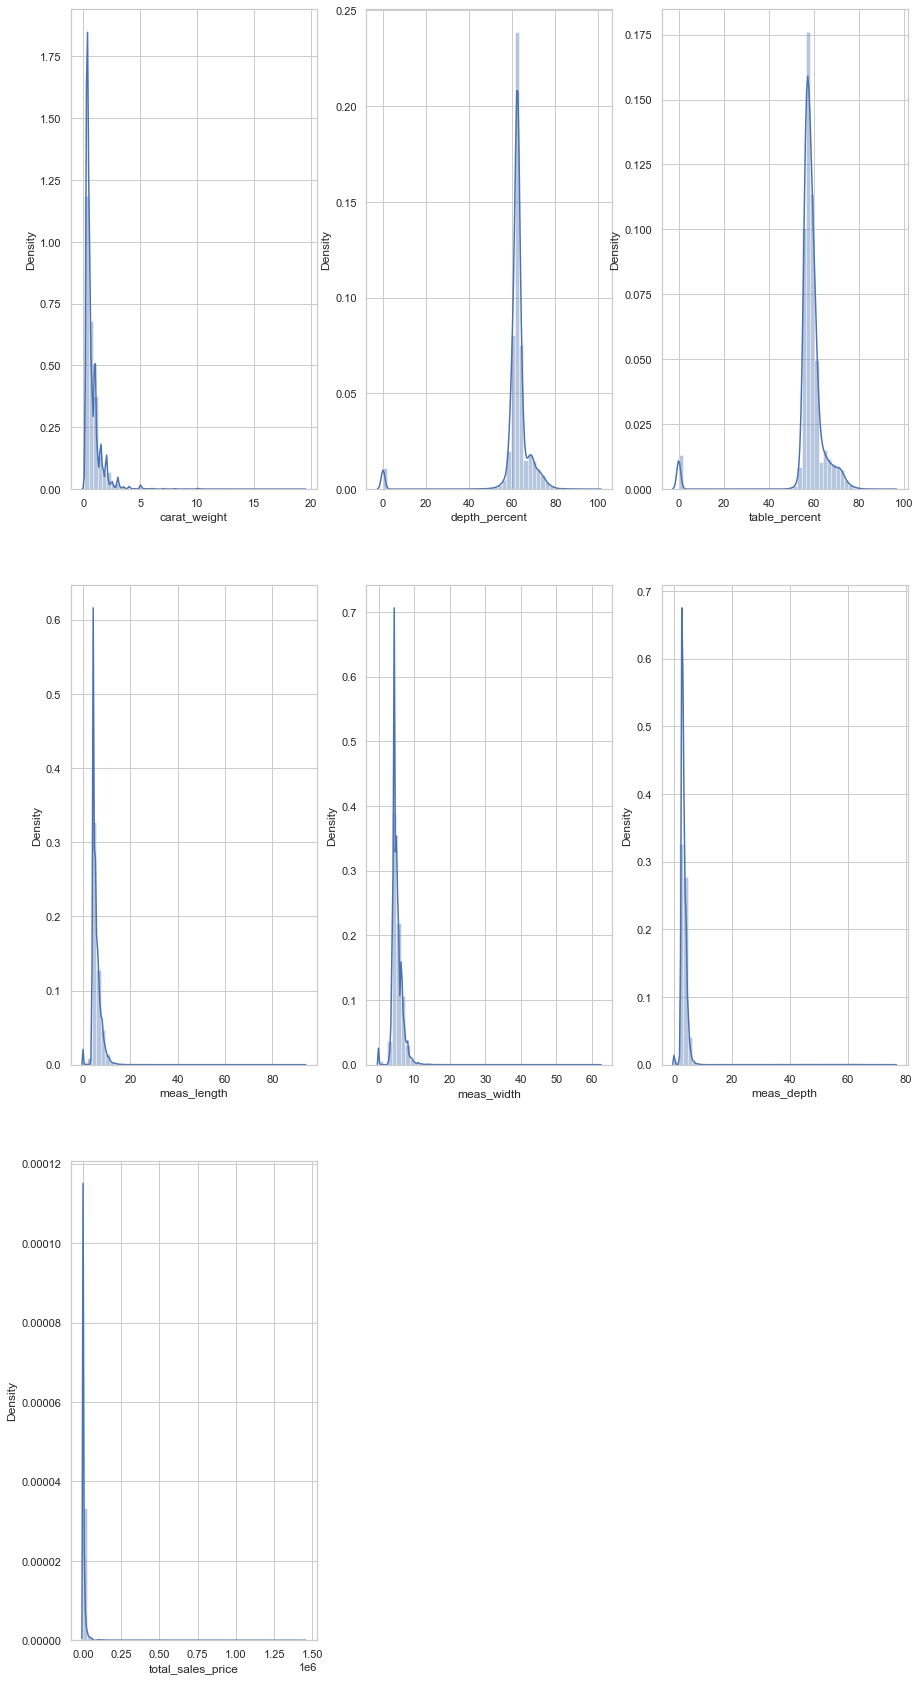

In [89]:
# Plotting histgram for each numerical columns to get a better idea about the distribution of the numeric data
fig, ax = plt.subplots(3, 3, figsize=(15, 30))
ax=ax.ravel()

for axid, col in enumerate(numeric_columns):
    sns.distplot(df[col], ax=ax[axid])
    plt.title=col

# Removing the last 2 unused subplots
for i in range(len(numeric_columns), len(ax)):
    fig.delaxes(ax[i])

In [90]:
print('Skewness for each numerical column')
for col in numeric_columns:
    print(col+' : '+str(df[col].skew()))

Skewness for each numerical column
carat_weight : 6.044751701764885
depth_percent : -5.133846209898752
table_percent : -4.53794997225588
meas_length : 2.295007701464152
meas_width : 2.269752732864105
meas_depth : 24.153614979342994
total_sales_price : 19.409830584608972


Columns
1) meas_depth
2) total_sales_price

seems to have highly right skewed data distribution.

c:\Users\nancy\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


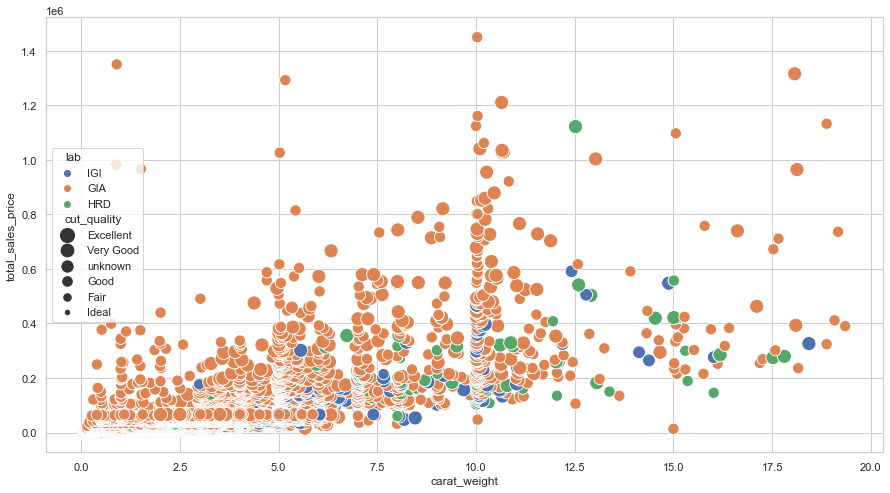

In [91]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["carat_weight"], y=df["total_sales_price"], hue=df["lab"], size=df["cut_quality"], sizes=(20, 200), legend="full")

From this plot, we can analyse that most of the diamonds have grading lab as 'GIA' certificate. Secondly, the cut quality of most of the diamonds is either Very Good, unknown or Execellent based on the sizes of the data points shown in the plot. 

Also, we can see that the total sales price is mostly within the range of 10,00,000 to 20,00,000 dollars. Also, the carat weight of the diamond is mostly within 0-2.5 g. 

We can see that there are certain verticle lines for example, carat weight 10 is very prominent hence showing that there is a larger reception in market for diamonds with carat weight 10.

c:\Users\nancy\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


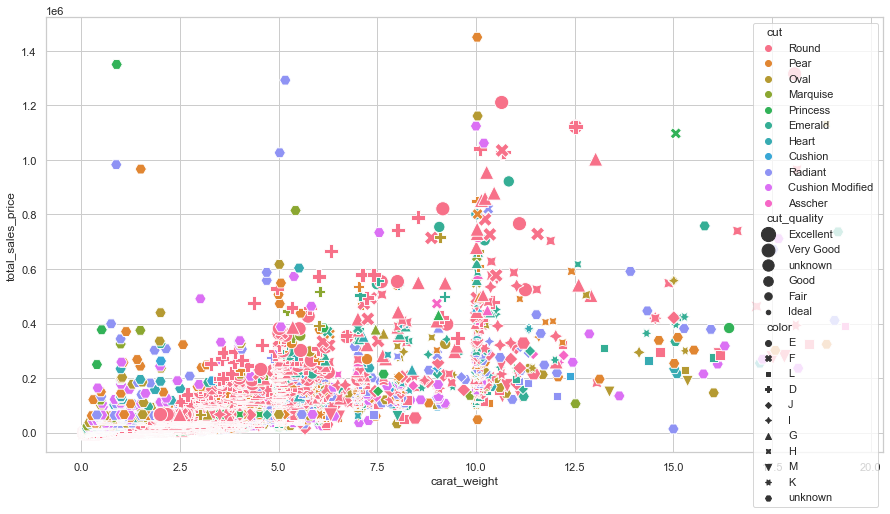

In [92]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["carat_weight"], y=df["total_sales_price"], hue=df["cut"], size=df["cut_quality"], style=df["color"], sizes=(20, 200), legend="full")

It can be observed that sales price increases with carat weight. Apart from that we can observe that only the cut quality do not determine the sales price, the color and is equally important. Also the diamond with a defined shape are more valuable than the one with unkown shape.

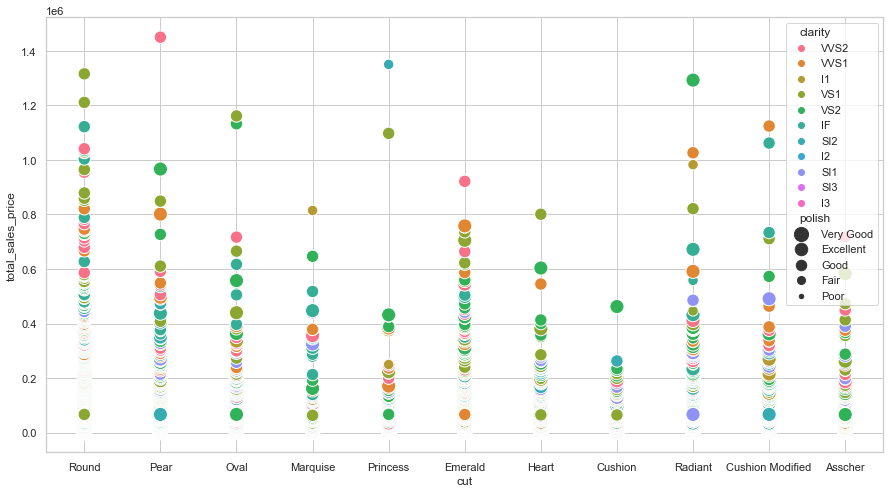

In [93]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["cut"], y=df["total_sales_price"], hue=df["clarity"], size=df["polish"], sizes=(20, 200), legend="full")

This plot is between total_sales_price and cut features of the diamond. The different colors or the hue represents the clarity feature of the diamond which seems to be evenly spreaded for all the clarity types. The size of the dots represents the polish nature of the diamond which seems to vary only between Very Good and Excellent types.

**Finding the Nulls in dataset**
---

Now we use the isnull() function to find the null values in the dataset.

In [97]:
df.isnull().sum()

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

In [95]:
for column in df.columns:
    nullvaluesindataset = (df[column] == "unknown").sum()
    print(f"{column} : {nullvaluesindataset}")

cut : 0
color : 9162
clarity : 0
carat_weight : 0
cut_quality : 60607
lab : 0
symmetry : 0
polish : 0
eye_clean : 156916
culet_size : 85740
culet_condition : 204384
depth_percent : 0
table_percent : 0
meas_length : 0
meas_width : 0
meas_depth : 0
girdle_min : 83432
girdle_max : 84295
fluor_color : 203977
fluor_intensity : 128
fancy_color_dominant_color : 210539
fancy_color_secondary_color : 218641
fancy_color_overtone : 217665
fancy_color_intensity : 210541
total_sales_price : 0


There are several columns where the value is UNKNOWN, hence that particular features doesn't affect or contribute in predicting the total sales price of the diamond.

From all the above analysis, we can summarize that there is a strong relatioship among carat weight, meas length, meas width, meas depth and depth percent. Hence, these will be our essential features for the training of the data set. 